In [1]:
using CSV
using DataFrames
using Printf
using JSON
using Statistics
using LinearAlgebra
using JLD2
using PyPlot
using FileIO
include("recsys_funcs.jl")

missing_mean (generic function with 1 method)

## fake data

create a fake $H$ matrix that obeys a known factorization

In [2]:
n_m = 200
n_g = 150
r = 2
M = randn(r, n_m)
G = randn(r, n_g)
γ = randn(1, n_g)
μ = randn(1, n_m)
h̄ = 0.6

H_truth = M' * G .+ γ .+ μ' .+ h̄

200×150 Array{Float64,2}:
  3.13598    -1.8796     -0.440533   …  -1.21546   -1.70082     4.18195 
  0.346039    0.0581007   0.841913       2.78601   -0.773542    0.340573
  2.38991    -1.41223     0.070865       0.284884  -1.65724     3.20593 
 -0.0933738   0.851996    1.13399        3.3336     0.0131568  -0.435382
 -2.21008     3.06015     1.10847        3.55408    2.56332    -3.82142 
 -0.540374   -3.16184    -0.716601   …   1.72047   -4.53153     0.224878
 -0.0118458  -2.22781    -1.31378       -0.666452  -2.54122     0.385707
  0.215385   -0.103679    1.19724        3.82672   -1.32602     0.31332 
 -0.392729   -1.14268    -3.49973       -6.21684    0.607816   -0.898427
 -0.816605   -2.27371    -1.09521        0.495536  -3.03574    -0.518275
  1.56589    -3.71457    -0.642694   …   0.61908   -4.71596     2.97107 
  2.97076    -0.921526   -1.81912       -4.9392     0.707158    3.35656 
 -1.56195    -0.513881   -0.650064       1.05461   -1.06167    -2.0028  
  ⋮                      

mask missing values

In [3]:
idx_missing = [rand(1:4) for i = 1:n_m, j = 1:n_g] .== 1
H = deepcopy(H_truth)
H = convert(Array{Union{Float64, Missing}}, H)
# H = copy(H_truth)
# [missing for i = 1:n_m, j = 1:n_g]
H[idx_missing] .= missing
H

200×150 Array{Union{Missing, Float64},2}:
  3.13598      missing  -0.440533   …  -1.21546   -1.70082     4.18195 
  0.346039     missing    missing        missing  -0.773542     missing
  2.38991    -1.41223    0.070865       0.284884  -1.65724      missing
 -0.0933738   0.851996    missing       3.3336     0.0131568    missing
 -2.21008      missing   1.10847        3.55408     missing     missing
 -0.540374   -3.16184   -0.716601   …   1.72047   -4.53153     0.224878
 -0.0118458  -2.22781   -1.31378       -0.666452    missing    0.385707
   missing     missing   1.19724        3.82672     missing    0.31332 
 -0.392729   -1.14268   -3.49973         missing    missing   -0.898427
 -0.816605   -2.27371     missing       0.495536  -3.03574    -0.518275
  1.56589    -3.71457   -0.642694   …   0.61908   -4.71596     2.97107 
   missing   -0.921526  -1.81912       -4.9392      missing    3.35656 
 -1.56195    -0.513881  -0.650064       1.05461   -1.06167    -2.0028  
  ⋮                   

In [4]:
λ₁ = 1000.0
λ₂ = 1000.0

M_p, G_p, μ_p, γ_p, h̄_p, train_rmses, losses = ALS(H, r, [λ₁, λ₂], 
    min_als_sweeps=50, verbose=true, max_als_sweeps=100)

H_predicted = M_p' * G_p .+ h̄_p .+ μ_p' .+ γ_p

M shape: (2, 200)	G shape: (2, 150)
ALS sweep 10
	training loss = 2683.06019081234
	training RMSE = 0.08953777702227458
ALS sweep 20
	training loss = 2639.6827169311537
	training RMSE = 0.08782058545939185
ALS sweep 30
	training loss = 2635.605098925641
	training RMSE = 0.0878108339373443
ALS sweep 40
	training loss = 2635.0600642547743
	training RMSE = 0.08774723684803022
ALS sweep 50
	training loss = 2635.0138308547175
	training RMSE = 0.08776224865275914
ALS sweep 60
	training loss = 2635.0294892264433
	training RMSE = 0.08777520471111364
loss stopped decreasing


200×150 Array{Float64,2}:
  2.99234     -1.7745     -0.398878   …  -1.15974   -1.59681     3.99297 
  0.354831     0.0671443   0.82202        2.66865   -0.726882    0.349009
  2.28376     -1.3333      0.0874376      0.275019  -1.56359     3.06323 
 -0.0641543    0.840601    1.10895        3.21117    0.0370009  -0.396372
 -2.08751      2.9608      1.06842        3.41709    2.48845    -3.63945 
 -0.488363    -3.00599    -0.658704   …   1.6417    -4.31137     0.240396
  0.00395897  -2.06929    -1.217         -0.61464   -2.35961     0.37204 
  0.23529     -0.0739564   1.18052        3.69253   -1.24838     0.324678
 -0.38453     -1.05544    -3.31618       -5.88171    0.613164   -0.862636
 -0.758076    -2.15007    -1.03247        0.45753   -2.86711    -0.477612
  1.51679     -3.52653    -0.573891   …   0.604758  -4.48197     2.85952 
  2.84457     -0.86221    -1.72704       -4.72866    0.70884     3.22606 
 -1.47479     -0.475037   -0.613153       1.00749   -0.994283   -1.89992 
  ⋮         

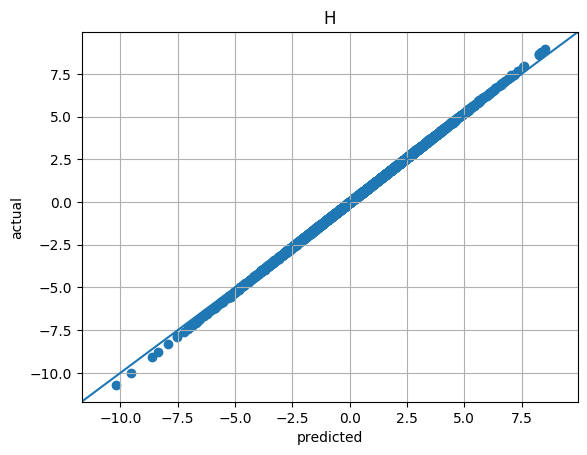

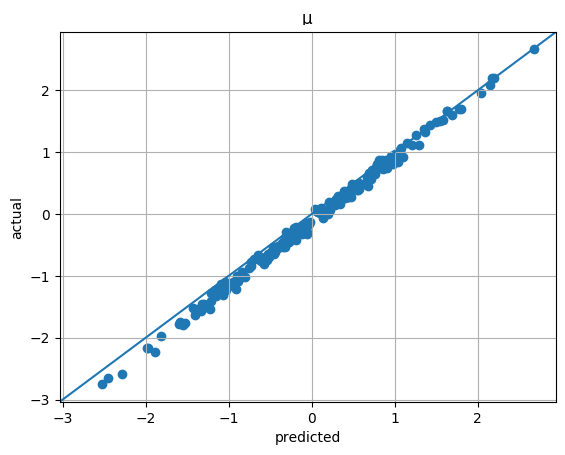

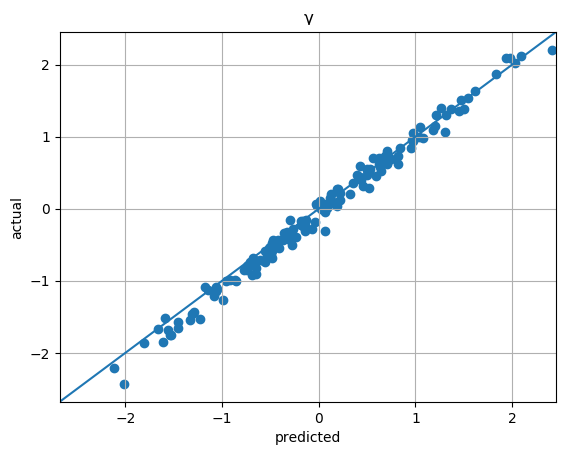

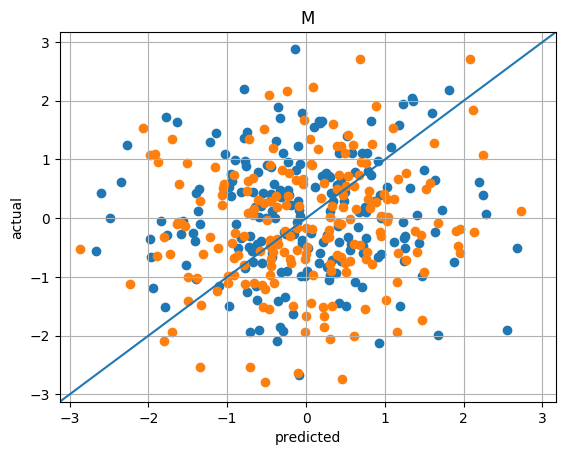

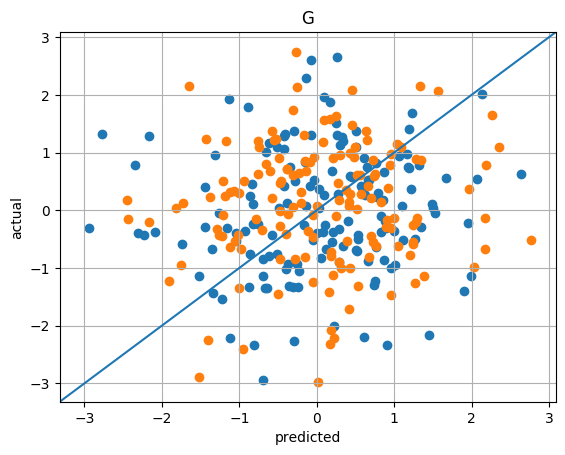

In [5]:
function mk_diagonal()
    lim = ax.get_ylim()
    ax.plot(lim, lim)
    ax.set_xlim(lim)
    ax.set_ylim(lim)
end

fig, ax = plt.subplots()
plt.scatter(H_predicted[idx_missing], H_truth[idx_missing])
plt.grid()
xlabel("predicted")
ylabel("actual")
mk_diagonal()
ax.set_title("H")
plt.show(fig)

    
fig, ax = plt.subplots()
plt.scatter(μ_p, μ)
xlabel("predicted")
ylabel("actual")
mk_diagonal()
plt.grid()
ax.set_title("μ")
plt.show(fig)

fig, ax = plt.subplots()
plt.scatter(γ_p, γ)
xlabel("predicted")
ylabel("actual")
mk_diagonal()
plt.grid()
ax.set_title("γ")
plt.show(fig)

fig, ax = plt.subplots()
plt.scatter(M_p[1, :], M[1, :])
plt.scatter(M_p[2, :], M[2, :])
xlabel("predicted")
mk_diagonal()
ylabel("actual")
plt.grid()
ax.set_title("M")
plt.show(fig)

fig, ax = plt.subplots()
plt.scatter(G_p[1, :], G[1, :])
plt.scatter(G_p[2, :], G[2, :])
xlabel("predicted")
mk_diagonal()
ylabel("actual")
plt.grid()
ax.set_title("G")
plt.show(fig)

# real data

In [6]:
henry_df = CSV.read(joinpath("..", "data", "henry_matrix_df_l_4.csv"))
H = convert(Array{Union{Float64, Missing}, 2}, henry_df[1:end, 2:end])
log_H = log10.(H);

M shape: (2, 222)	G shape: (2, 40)
ALS sweep 10
	training loss = 741.5621108416478
	training RMSE = 0.8415398288040331
ALS sweep 20
	training loss = 742.6852228190289
	training RMSE = 0.8390434250150638
ALS sweep 30
	training loss = 742.7150857277791
	training RMSE = 0.8389965944287052
ALS sweep 40
	training loss = 742.715736538726
	training RMSE = 0.8389956936154993
ALS sweep 50
	training loss = 742.715751838923
	training RMSE = 0.8389956746635826
ALS sweep 

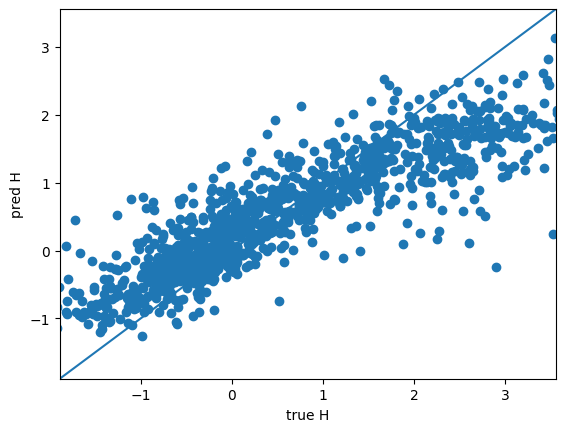

60
	training loss = 742.715752151191
	training RMSE = 0.8389956742894764
loss stopped decreasing


(-1.8866030169704175, 3.5518354913645256)

In [25]:
M, G, μ, γ, h̄, train_rmses, losses = ALS(log_H, r, [λ₁, λ₂], 
    min_als_sweeps=50, verbose=true, max_als_sweeps=100)

log_H_pred = M' * G .+ γ .+ μ' .+ h̄

# should at least fit the training data!
fig, ax = plt.subplots()
scatter(log_H[.! ismissing.(log_H)], log_H_pred[.! ismissing.(log_H)])
xlabel("true H")
ylabel("pred H")
mk_diagonal()

In [ ]:
test_error, log_H_pred = LOO_cross_validation(log_H, 2, 0.1, 0.1, "test_save_jld", 
    min_als_sweeps=5, max_als_sweeps=10)

------------------------------
Starting LOO-ALS with the following parameters:
	r = 2, λ = [0.1000, 0.1000]


Progress:  58%|███████████████████████▊                 |  ETA: 0:00:07

In [ ]:
# remove outliers

idx = (.! ismissing.(log_H)) .& (log_H_pred .< 10.0)

fig, ax = plt.subplots()
hexbin(log_H[idx], log_H_pred[idx])
mk_diagonal()
xlabel("true H")
ylabel("pred H")
title("LOO")

SS_tot = sum((log_H[idx] .- mean(log_H[idx])) .^ 2)
SS_res = sum((log_H_pred[idx] .- mean(log_H[idx])) .^ 2)
R2 = 1 - SS_tot / SS_res